In [2]:
import random 
import string

def generate_random_string(length):
    return ''.join(random.choices(string.ascii_lowercase, k=length))

def generate_random_palindrome(length):
    ret = ""
    half_ret = generate_random_string(length//2)
    if(length % 2 == 1):
        ret = half_ret + "a" + (half_ret[::-1])
    else:
        ret = half_ret + (half_ret[::-1])
    return ret

def generate_n_spaced_palindromes(n):
    length = random.randint(1, (30000 - 2 * n) //n)
    ret = ""
    for _ in range(n):
        sub_palindrome = generate_random_palindrome(length)
        ret += sub_palindrome
        ret += "qk" # seperator
    return ret

def generate_test_case(n):
    t = 100
    strings = []
    for _ in range (100):
        strings.append(generate_random_string(n))
    for _ in range (100):
        strings.append(generate_n_spaced_palindromes(n//5))
    
    return t, strings

In [16]:
import subprocess
import time

command = "cd cpp && make build && cd .."
result = subprocess.run(command, shell=True, capture_output=True)
command = "stack install"
result = subprocess.run(command, shell=True, capture_output=True)
time_difs_c = []
time_difs_hs = []
xs = []
command_c = "cpp/build/msubstr"
command_hs = "msubstr"
for i in range(1, 15):
    new_t, new_string = generate_test_case((i+1) * 2000)
    generated_input = f"{new_t}\n" + "\n".join(new_string)

    xs.append((i+1) * 2000)
    time_difs_c.append([])
    for j in range (10):
        starting_time = time.time_ns()
        result = subprocess.run(command_c, shell=True, input=generated_input, text=True, capture_output=True)
        end_time = time.time_ns()
        time_dif = end_time - starting_time
        time_dif_ns = time_dif
        time_difs_c[i-1].append(time_dif_ns)
        
    time_difs_hs.append([])
    for j in range (10):
        starting_time = time.time_ns()
        result = subprocess.run(command_hs, shell=True, input=generated_input, text=True, capture_output=True)
        end_time = time.time_ns()
        time_dif = end_time - starting_time
        time_dif_ns = time_dif
        time_difs_hs[i-1].append(time_dif_ns)

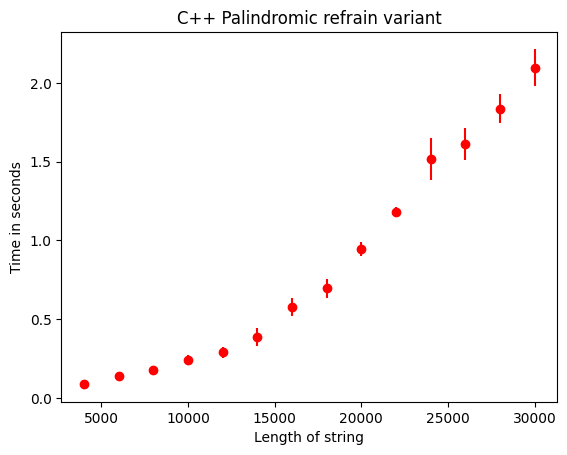

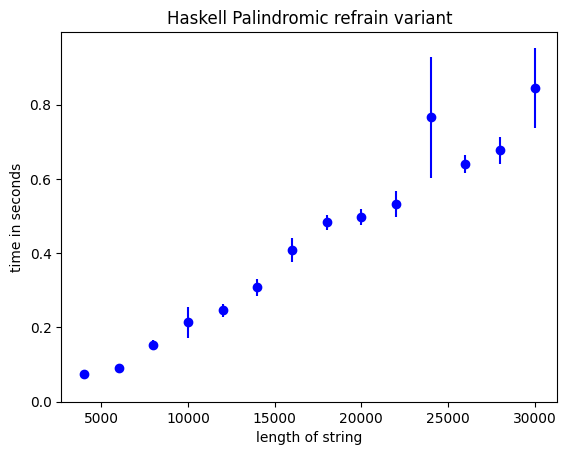

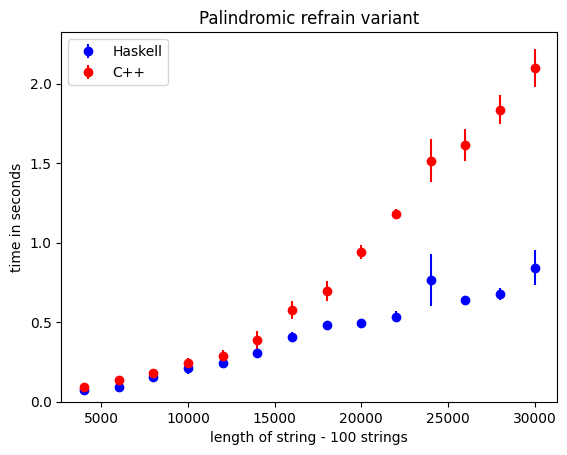

In [18]:
import numpy as np
import matplotlib.pyplot as plt
mean_c, std_c = [], []
mean_hs, std_hs = [], []

for i in range (14):
    mean_c.append(np.mean(time_difs_c[i])/1e9)
    std_c.append(np.std(time_difs_c[i])/1e9)
    mean_hs.append(np.mean(time_difs_hs[i])/1e9)
    std_hs.append(np.std(time_difs_hs[i])/1e9)

plt.errorbar(xs, mean_c, yerr=std_c, fmt="o", color="r")
plt.ylabel("Time in seconds")
plt.xlabel("Length of string")
plt.title("C++ Palindromic refrain variant")
plt.show()

plt.errorbar(xs, mean_hs, yerr=std_hs, fmt="o", color="b")
plt.title("Haskell Palindromic refrain variant")
plt.ylabel("time in seconds")
plt.xlabel("length of string")
plt.ylim(0)
plt.show()

plt.errorbar(xs, mean_hs, yerr=std_hs, fmt="o", color="b", label="Haskell")
plt.errorbar(xs, mean_c, yerr=std_c, fmt="o", color="r", label="C++")
plt.title("Palindromic refrain variant")
plt.ylabel("time in seconds")
plt.xlabel("length of string - 100 strings")
plt.ylim(0)
plt.legend()
plt.show()


In [8]:
import subprocess
import time

command = "cd cpp && make build && cd .."
result = subprocess.run(command, shell=True, capture_output=True)
command = "stack install"
result = subprocess.run(command, shell=True, capture_output=True)
xs = [17, 500, 1000, 2000, 4000, 6000, 8000, 10000]
time_difs_c = []
time_difs_hs = []
command_c = "cpp/build/queries"
command_hs = "queries"
for i in range(1, 9):
    input_file = f"tests/queries-tests/{i}"
    input_content = ""
    time_difs_c.append([])
    time_difs_hs.append([])
    with open(input_file, 'r') as file:
        input_content = file.read()
        for j in range (10):
            starting_time = time.time_ns()
            result = subprocess.run(command_c, shell=True, text=True, capture_output=True, input=input_content)
            end_time = time.time_ns()
            time_dif = end_time - starting_time
            time_dif_ns = time_dif
            time_difs_c[i-1].append(time_dif_ns)
        for j in range (10):
            starting_time = time.time_ns()
            result = subprocess.run(command_hs, shell=True, text=True, capture_output=True, input=input_content)
            end_time = time.time_ns()
            time_dif = end_time - starting_time
            time_dif_ns = time_dif
            time_difs_hs[i-1].append(time_dif_ns)

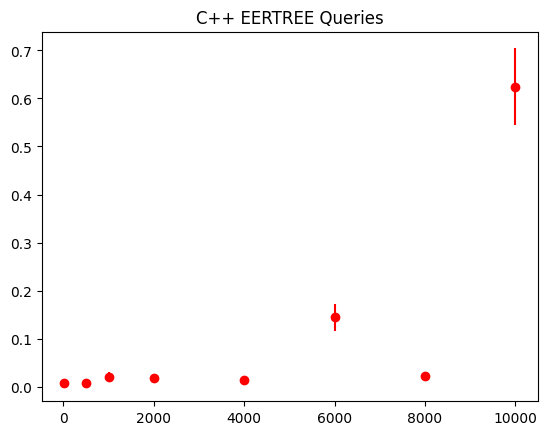

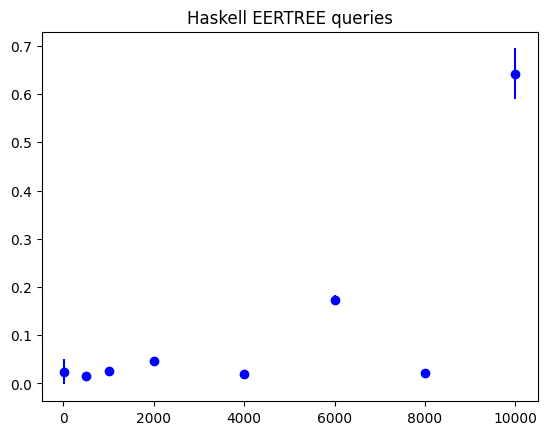

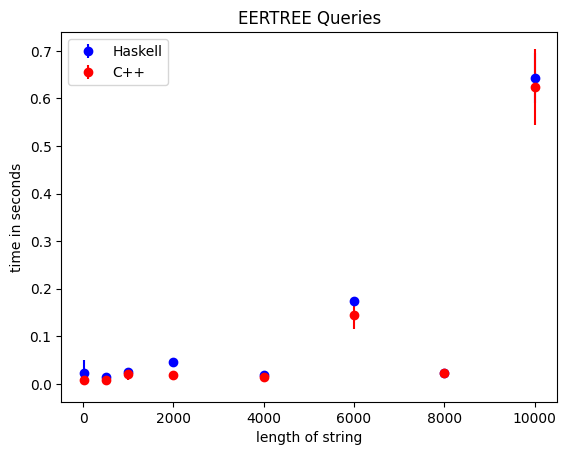

In [9]:
import numpy as np
import matplotlib.pyplot as plt

mean_c, std_c = [], []
mean_hs, std_hs = [], []

for i in range (8):
    mean_c.append(np.mean(time_difs_c[i])/1e9)
    std_c.append(np.std(time_difs_c[i])/1e9)
    mean_hs.append(np.mean(time_difs_hs[i])/1e9)
    std_hs.append(np.std(time_difs_hs[i])/1e9)

plt.errorbar(xs, mean_c, yerr=std_c, fmt="o", color="r")
plt.title("C++ EERTREE Queries")
plt.show()
plt.errorbar(xs, mean_hs, yerr=std_hs, fmt="o", color="b")
plt.title("Haskell EERTREE queries")
plt.show()
plt.errorbar(xs, mean_hs, yerr=std_hs, fmt="o", color="b", label="Haskell")
plt.errorbar(xs, mean_c, yerr=std_c, fmt="o", color="r", label="C++")
plt.title("EERTREE Queries")
plt.ylabel("time in seconds")
plt.xlabel("length of string")
plt.legend()
plt.show()
